<center>


<div style="display: flex; justify-content: center;">
    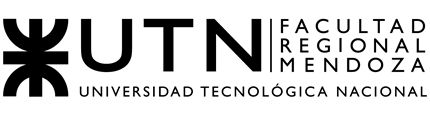
</div>
</center>
<center>
    <div style="font-family: 'Georgia', serif; font-size: 24px;">
        <p><strong>Ingeniería en Electrónica. Análisis de Señales y Sistemas</strong></p>
    </div>
</center>

# Trabajo Práctico $N^{\circ}3$: Análisis de Fourier en tiempo discreto

En el ámbito del procesamiento de señales discretas, existen varias razones que justifican la utilización de la Transformada de Fourier en Tiempo Discreto (DTFT) y sus versiones computacionales más utilizadas: la Transformada de Fourier Discreta (DFT) y la Transformada Rápida de Fourier (FFT). Algunas de las principales aplicaciones incluyen:

- **Análisis de Audio**: Permite analizar el contenido de frecuencias de una señal de audio, lo cual es útil para ecualizadores, eliminación de ruido y compresión de datos. Por ejemplo, los ecualizadores de audio que usamos en equipos de música ajustan las intensidades de diferentes rangos de frecuencia para modificar el sonido según nuestras preferencias.

- **Procesamiento de Imágenes**: Aplicando la Transformada de Fourier bidimensional (2D) sobre una imagen, podemos analizar la información de frecuencias espaciales presentes en ella. Esto se utiliza en aplicaciones como el filtrado de imágenes para mejorar su calidad o detectar bordes.

- **Telecomunicaciones**: En los sistemas de comunicación, el análisis en frecuencia es fundamental para la modulación y demodulación de señales, que permite transmitir información eficientemente por diferentes canales.

- **Diagnóstico de Sistemas**: En aplicaciones industriales, el análisis de vibraciones utilizando la Transformada de Fourier permite detectar fallas en máquinas analizando las frecuencias de vibración que estas emiten durante su funcionamiento.

### Diferencias entre DTFT, DFT y FFT
- **Transformada de Fourier en Tiempo Discreto (DTFT)**: Es una representación analítica que transforma una señal discreta (en el dominio del tiempo) en una función continua en el dominio de la frecuencia. Nos permite conocer cómo está distribuida la energía de una señal en el espectro de frecuencias de forma exacta, pero no es posible trabajar con la DTFT en un sistema digital.

- **Transformada de Fourier Discreta (DFT)**: Es una versión discreta y computable de la DTFT, que opera sobre un número finito de muestras. La DFT proporciona una aproximación del espectro de frecuencia de la señal y es la base para la mayoría de las aplicaciones prácticas en el procesamiento digital de señales.

- **Transformada Rápida de Fourier (FFT)**: Es un algoritmo eficiente para calcular la DFT. Mientras que la DFT tiene una complejidad de $O(N^2)$, la FFT reduce considerablemente este tiempo a $O(N \log N)$, lo que la hace ideal para el procesamiento de señales en tiempo real o para trabajar con grandes volúmenes de datos.

**Nota sobre Complejidad Computacional**: La complejidad computacional se refiere al tiempo que un algoritmo tarda en ejecutarse, en función de la cantidad de datos que procesa. En el caso de la FFT, la reducción de la complejidad de $O(N^2)$ a $O(N \log N)$ significa que, a medida que aumenta la cantidad de muestras de la señal, el tiempo de ejecución del algoritmo crece mucho más lentamente en comparación con el cálculo directo de la DFT. Esta mejora es especialmente importante cuando trabajamos con grandes volúmenes de datos, ya que hace posible el análisis de señales en tiempo real y el procesamiento eficiente de información.



### Objetivos del Trabajo Práctico
El objetivo de este trabajo práctico es proporcionar una comprensión profunda del análisis de Fourier en tiempo discreto y cómo aplicarlo de manera efectiva utilizando herramientas computacionales como Python. Exploraremos cómo realizar la Transformada de Fourier Discreta de señales, interpretar el espectro de frecuencia, y aplicar filtros en el dominio de la frecuencia para manipular las señales. Además, se busca que los estudiantes desarrollen la capacidad de interpretar y analizar espectros de frecuencia en aplicaciones prácticas.

## Uso de la función `fft` de Scipy

Para calcular la Transformada Rápida de Fourier (FFT), utilizaremos la función `fft` del módulo `scipy.fft`.

### Uso Básico de `fft`

El uso básico de `fft` es directo y permite transformar una señal en el dominio del tiempo al dominio de la frecuencia:




In [1]:
from scipy.fft import fft

# Definimos una señal de ejemplo
data = [0.0, 1.0, 0.0, -1.0]

# Calculamos la FFT de la señal
data_fft = fft(data)
data_fft


array([0.-0.j, 0.-2.j, 0.-0.j, 0.+2.j])

En este ejemplo, `data` contiene valores de una señal discreta en el tiempo, y `fft(data)` devuelve su representación en el dominio de la frecuencia como `data_fft`, con coeficientes complejos que corresponden a las diferentes componentes de frecuencia.


### Ejemplo Completo con `fft` y `fftfreq`

Para visualizar los resultados de la `fft`, también usaremos la función de `scipy` llamada `fftfreq`.

La función `fftfreq` toma dos parámetros principales:
- **N**: La cantidad de muestras de la señal (es decir, el número de puntos en el dominio temporal).
- **T**: El intervalo de tiempo entre cada muestra (generalmente \( T = \frac{1}{f_s} \), donde \( f_s \) es la frecuencia de muestreo).

El resultado de `fftfreq(N, T)` es un vector que contiene las frecuencias en el dominio de la Transformada de Fourier. Este arreglo nos dice qué frecuencia representa cada punto de la Transformada calculada con la función `fft`.

Primero importaremos las funciones y librerías necesarias.


In [2]:
import numpy as np
from scipy.fft import fftfreq
import matplotlib.pyplot as plt

Ahora vamos a querer graificar una señal senoidal de frecuencia de 50 Hz.

Ahora crearemos un vector que llamaremos `t` que representará el tiempo continuo y otro que representará una la señal senoidal de frecuencia $f=50Hz$. Para poder muestrearla correctamente necesitaríamos una frecuencia de muestreo de al menos $100Hz$. Utilizaremos $f_s=1000Hz$ para estar holgados y tener una buena representación de la señal en forma discreta.

In [3]:
# Constantes de la señal
fs= 1000 #frecuencia de muestreo
N = 4000  # Número de muestras de la señal
T = 1.0 / fs  # Intervalo de muestreo 1/fs,
t = np.linspace(0.0, N*T, N)  # Vector de tiempo desde
x = np.sin(50.0 * 2.0*np.pi*t)   # Señal sinusoide de frecuencia f = 50 Hz


Ahora calcularemos la FFT sobre la señal y obtendremos el vector que indica a qué frecuencia corresponde cada valor de la FFT con `fftfreq(N, T)`.  

In [4]:
# Transformada de Fourier de la señal
x_fft = fft(x)

# Frecuencias correspondientes en el espectro
frecuencias = fftfreq(N, T)
# fftfreq calcula las frecuencias asociadas a cada componente de la FFT,
# siendo útil para ubicar correctamente cada valor de la Transformada en su frecuencia correspondiente



Graficamos la señal original y su espectro de frecuencia

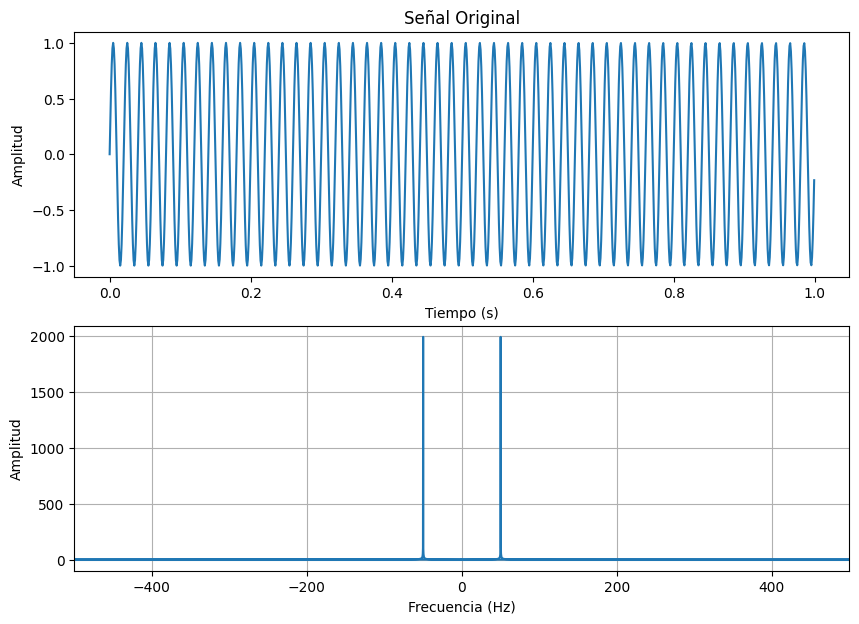

In [5]:
# Graficamos la señal original y su espectro de frecuencia
plt.figure(figsize=(10, 7))

# Gráfico de la señal en el dominio del tiempo
plt.subplot(2, 1, 1)
plt.plot(t[0:1000], x[0:1000]) # Grafico solo una porción de la señal
                               # con fines de visualizarla con claridad
                               # es opcional y se debe ajustar en cada caso.
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Gráfico del espectro en el dominio de la frecuencia
plt.subplot(2, 1, 2)
plt.plot(frecuencias, np.abs(x_fft))  # Tomamos solo la mitad positiva
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(-fs/2, fs/2) #como la frecuencia de muestreo es 1000Hz visualizaremos hasta fs/2

plt.grid()
plt.show()


Ejercicio 1, sumarle a la señal `x` una señal senoidal con frecuencia $f2 = 80Hz$ y graficar la FFT.

Ejercicio 2. Utilizando `scipy` crear una señal cuadrada de frecuencia $f=25Hz$ (ver tutorial de python nº 6), y calcular su espectro.

Ahora crearemos una figura interactiva para ver cómo varia el espectro de una señal senoidalal al variar su frecuencia y amplitud.

In [6]:
from ipywidgets import interactive
import ipywidgets as widgets

# Parámetros fijos de la señal
fs = 1000  # Frecuencia de muestreo
N = 4000  # Número de muestras de la señal
T = 1.0 / fs  # Intervalo de muestreo
t = np.linspace(0.0, N * T, N)  # Vector de tiempo de 4 segundos (4000 muestras en total)

# Función para actualizar la señal y su FFT
def actualizar_grafico(frecuencia=50.0, amplitud=1.0):
    # Generación de la señal sinusoidal con los parámetros variables
    x = amplitud * np.sin(frecuencia * 2.0 * np.pi * t)

    # Cálculo de la FFT
    x_fft = fft(x)
    frecuencias = fftfreq(N, T)

    # Crear las figuras
    plt.figure(figsize=(9, 4))

    # Subplot de la señal en el dominio del tiempo (mostrando solo el primer segundo)
    plt.subplot(2, 1, 1)
    plt.plot(t[:fs], x[:fs])  # Mostrar solo el primer segundo de la señal
    plt.title('Señal en el Tiempo (Primer Segundo)')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.ylim(-2, 2)  # Fija la amplitud en el eje y
    plt.grid()

    # Subplot del espectro de frecuencias
    plt.subplot(2, 1, 2)
    plt.plot(frecuencias, np.abs(x_fft) / N)
    plt.title('Espectro de amplitud')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.xlim(-100, 100)  # Eje de frecuencias fijo
    plt.ylim(0, 1)  # Eje de amplitudes fijo
    plt.grid()

    plt.tight_layout()
    plt.show()



# Crear la interacción
interactive_plot = interactive(
    actualizar_grafico,
    frecuencia=(1, 100, 1),  # Frecuencia de 1 a 100 Hz en pasos de 1 Hz
    amplitud=(0.1, 2, 0.1)      # Amplitud de 1 a 20, que se dividirá por 10 en la función
)
display(interactive_plot)


interactive(children=(IntSlider(value=50, description='frecuencia', min=1), FloatSlider(value=1.0, description…

# Utilidades de python Para sistemas LTI descrito por su función de transferencia

## Sistemas LTI continuos

La función `lti` en `scipy.signal` de Python es útil para representar y analizar sistemas lineales en el dominio del tiempo continuo, especialmente en el contexto de sistemas dinámicos descritos por ecuaciones diferenciales lineales de primer y segundo orden.

### Uso Básico de lti

La función `lti` se utiliza para definir sistemas lineales en términos de su función de transferencia, que suele ser la relación entre el numerador y denominador en el dominio de Laplace. La forma general es:

In [8]:
from scipy.signal import lti

# Definir un sistema con el numerador y denominador de la función de transferencia
numerador = [1, 5]  # Coeficientes del numerador
denominador = [1, 3, 2]  # Coeficientes del denominador
sistema = lti(numerador, denominador)

Este sistema representaría la función de transferencia
$$
H(s) = \frac{s+5}{s^2 + 3s + 2}
$$
que puede ser asociado a una ecuación diferencial en el dominio del tiempo.


### Operaciones Comunes con `lti`

Una vez definido el sistema, la biblioteca `lti` permite varias operaciones para analizar el sistema:


1. Respuesta al impulso:

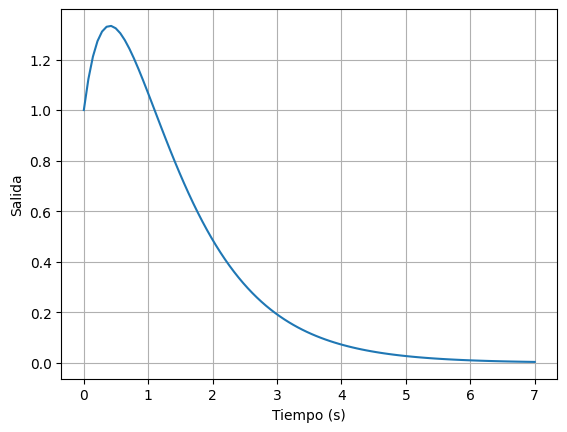

In [9]:
t, y_impulso = sistema.impulse()


plt.plot(t, y_impulso)
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida')
plt.grid()
plt.show()


2. Respuesta al escalón:

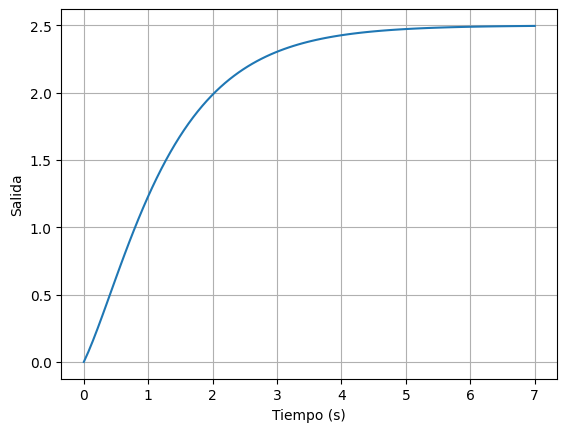

In [10]:
t, y_escalon = sistema.step()
plt.plot(t, y_escalon)
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida')
plt.grid()
plt.show()

3. Respuesta a una entrada arbitraria (respuesta temporal):

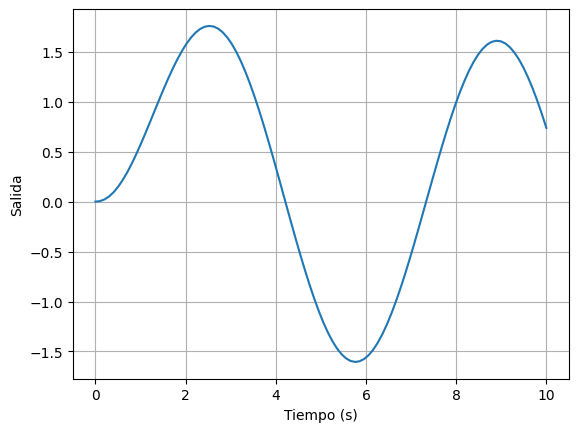

In [11]:
from scipy.signal import lsim

# Definir una entrada u(t) y su tiempo correspondiente t
t = np.linspace(0, 10, 100)  # tiempo
u = np.sin(t)  # entrada, por ejemplo, una onda sinusoidal
t, y, x = lsim(sistema, U=u, T=t)

plt.plot(t, y)
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida')
plt.grid()
plt.show()

4. Análisis en frecuencia:

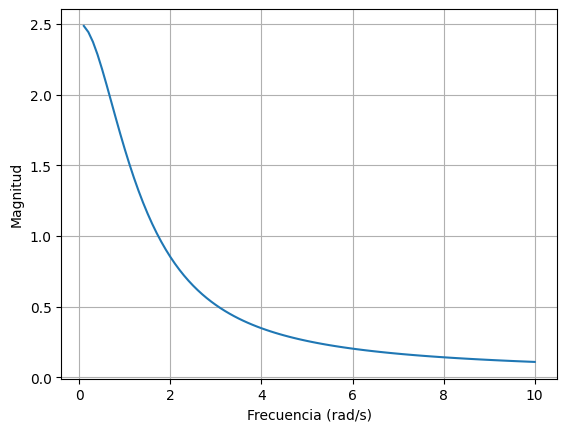

In [12]:
w = np.linspace(0.1, 10, 100)
_, H = sistema.freqresp(w)
plt.plot(w, np.abs(H))
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Magnitud')
plt.grid()
plt.show()

5. Polos y ceros

In [13]:
polos = sistema.poles
ceros = sistema.zeros

print(f'Polos: {polos} , Ceros: {ceros}')

Polos: [-2. -1.] , Ceros: [-5.]


Ejercicio 3. Crear el sistema del ejercicio de gabinete 5b y obtener:

1. La respuesta al impulso y comparar con la respuesta del ejercicio.
2. Los polos y los ceros.
3. La gráfica de la respuesta en frecuencia.